<a href="https://colab.research.google.com/github/davidsonsantana89/modelos-preditivos/blob/main/dass_Projeto_final_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJETO FINAL

Davidson Alves Santos de Santana

###Imports

Nessa seção iremos importar as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
pd.set_option('display.max_columns', None)

###Carregar a base de dados

Abaixo iremos carregar a base de dados "Non verbal tourists data DataSet".
Disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv

Obs: iremos considerar a variável de saída: **Tipo/classe do cliente**

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv'

df = pd.read_csv(url)

df.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,indiferent,dislikes,4,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,likes,?,2,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,5,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,indiferent,dislikes,3,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,3,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

In [10]:
# Verificar a quantidade e quais são os valores únicos de cada feature
for coluna in df.columns:
  val_unic = df[coluna].unique()
  print(f'Há {len(val_unic)} valores únicos na coluna: "{coluna}"')
  print(val_unic)
  print('---------------------')

Há 2 valores únicos na coluna: "sex"
['F' 'M']
---------------------
Há 41 valores únicos na coluna: "age"
[42 60 25 43 30 31 64 51 28 78 36 33 37 56 53 55 67 24 58 34 61 48 49 39
 63 65 45 76 66 71 80 46 40 81 77 38 41 26 29 47 27]
---------------------
Há 16 valores únicos na coluna: "country"
['uruguay' 'brasil' 'england' 'canada' 'hungary' 'argentina' 'polish'
 'colombia' 'scotland' 'chile' 'germany' 'cuba' 'italy' 'russia' 'mexico'
 'spain']
---------------------
Há 2 valores únicos na coluna: "returning"
['no' 'yes']
---------------------
Há 3 valores únicos na coluna: "GImg1"
['likes' 'indiferent' 'dislikes']
---------------------
Há 3 valores únicos na coluna: "GImg2"
['indiferent' 'dislikes' 'likes']
---------------------
Há 4 valores únicos na coluna: "GImg3"
['indiferent' 'dislikes' 'likes' '?']
---------------------
Há 2 valores únicos na coluna: "PImg1"
['likes' 'indiferent']
---------------------
Há 1 valores únicos na coluna: "PImg2"
['likes']
---------------------
Há 3 

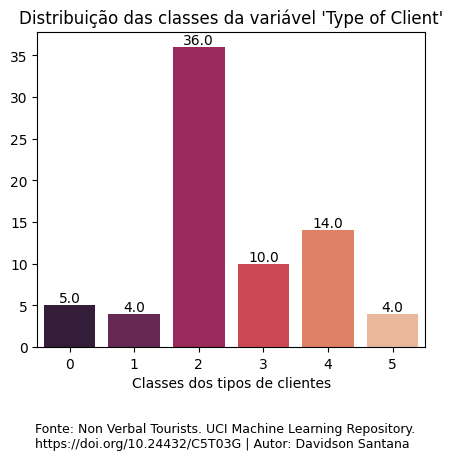

In [5]:
# Verificar a distribuição das classes da feature de classificação.
fig, ax = plt.subplots(figsize=(5,5))
cores = sns.color_palette("rocket")
ax = sns.barplot(x = df['Type of Client'].value_counts().index,
                 y = df['Type of Client'].value_counts().values,
                 hue=df['Type of Client'].value_counts().index, palette=cores,
                 legend=False)

plt.title("Distribuição das classes da variável 'Type of Client'")
plt.xlabel('Classes dos tipos de clientes');

# Adicionar anotações para cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.figtext(0.12, 0.05, 'Fonte: Non Verbal Tourists. UCI Machine Learning Repository. \nhttps://doi.org/10.24432/C5T03G | Autor: Davidson Santana', fontsize=9)

# Ajustar a posição dos subplots para deixar mais espaço na parte inferior
plt.subplots_adjust(bottom=0.25)

plt.savefig('01-dist_type_of_client.png')
plt.show()

Explorando as colunas que apresentam o valor '?'

In [7]:
colunas_ = []

for column in df.columns:
  if '?' in df[column].unique():
    colunas_.append(column)

print(f"Há {len(colunas_)} colunas com o valor '?' em seus registros." )
print(f"As colunas com valor '?' são: {colunas_}. ")

Há 3 colunas com o valor '?' em seus registros.
As colunas com valor '?' são: ['GImg3', 'PImg5', 'Authoritative -anarchic ']. 


In [9]:
for column in colunas_:
  print('VALOR --- QUANTIDADE')
  print(df[column].value_counts())
  print('=========================')
  print('\n')

VALOR --- QUANTIDADE
likes         41
indiferent    19
dislikes      12
?              1
Name: GImg3, dtype: int64


VALOR --- QUANTIDADE
dislikes      70
?              2
indiferent     1
Name: PImg5, dtype: int64


VALOR --- QUANTIDADE
2     13
9      9
4      9
3      8
1      8
10     7
8      5
7      5
6      5
5      3
?      1
Name: Authoritative -anarchic , dtype: int64




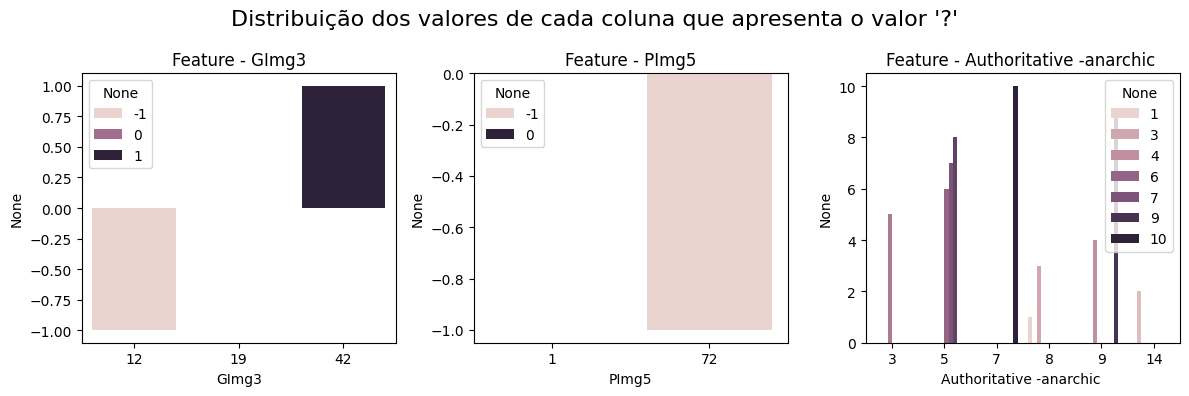

In [83]:
# Vamos criar gráficos de barras horizontais para cada uma das três colunas
# que apresentam o valor "?"

fig, ax_ = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
plt.gcf()

for n, col in enumerate(colunas_):
  sns.barplot(x=df[col].value_counts().values, y=df[col].value_counts().index, ax=ax_[n], hue=df[col].value_counts().index)
  ax_[n].set_title(f'Feature - {col}')
  ax_[n].set_xlabel(f'{col}')

plt.suptitle("Distribuição dos valores de cada coluna que apresenta o valor '?'", size=16)

plt.tight_layout()  # Ajustar layout para evitar sobreposição de elementos
plt.show()  # Mostrar gráficos

###Tratamento dos dados

Abaixo trate os valores "?" presente em algumas colunas. Use a estratégia que for mais confortável.

Dica: Use a função `replace`.

In [30]:
# O valores "?" de cada coluna serão substituídos pela categoria de maior representatividade de cada coluna em questão
# utilizei esta estratégia pelo fato de tais valores "?" estarem quantidades iguais a 1 ou 2, nas colunas que aparacem.

df['GImg3'].replace('?', 'likes', inplace=True)
df['PImg5'].replace('?', 'dislikes', inplace=True)
df['Authoritative -anarchic '].replace('?', '2', inplace=True)
df['Authoritative -anarchic '] = df['Authoritative -anarchic '].astype('int64')

In [31]:
# Visualizando os cinco primeiros registros após as substituições feitas
df.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,indiferent,dislikes,4,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,likes,dislikes,2,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,5,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,indiferent,dislikes,3,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,3,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0


A seguir substitua os valores categóricos (
Male, Female, Indifferent, likes, dislikes) por valores numéricos definidos por você.

Dica: leia a [página](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) da documentação da biblioteca Pandas.


In [32]:
# criar um dicionário cujas chaves são os valores a serem substituídos e os respectivos valores são os novos registros
dic_categorias = {'M': 0, 'F': 1, 'indiferent': 0, 'likes': 1, 'dislikes': -1}

# utilizar o método replace e utilizar como argumento de mapeamento o dicionário criando anteriormente
df.replace(dic_categorias, inplace=True)

In [33]:
df.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,1,42,uruguay,no,1,0,0,1,1,0,0,-1,4,8,3,C,-1,-1,0,-1,-1,-1,0
1,0,60,brasil,no,1,0,0,1,1,1,1,-1,2,9,1,B,-1,-1,1,1,-1,-1,0
2,1,25,england,no,0,0,0,1,1,0,1,-1,5,10,5,C,-1,-1,1,-1,-1,-1,0
3,0,43,canada,no,1,-1,-1,1,1,0,0,-1,3,2,1,C,-1,-1,1,-1,0,-1,0
4,0,30,hungary,no,0,0,0,1,1,0,1,-1,3,9,3,C,-1,-1,1,0,-1,-1,0


In [34]:
df.shape

(73, 23)

Visualize os dados usando das funções que achar necessarias e caso necessario remova as colunas que não agreguem informação. Pode utilizar a matriz de correlação para selecionar ou remover features. Justifique a remoção de colunas caso ocoram.

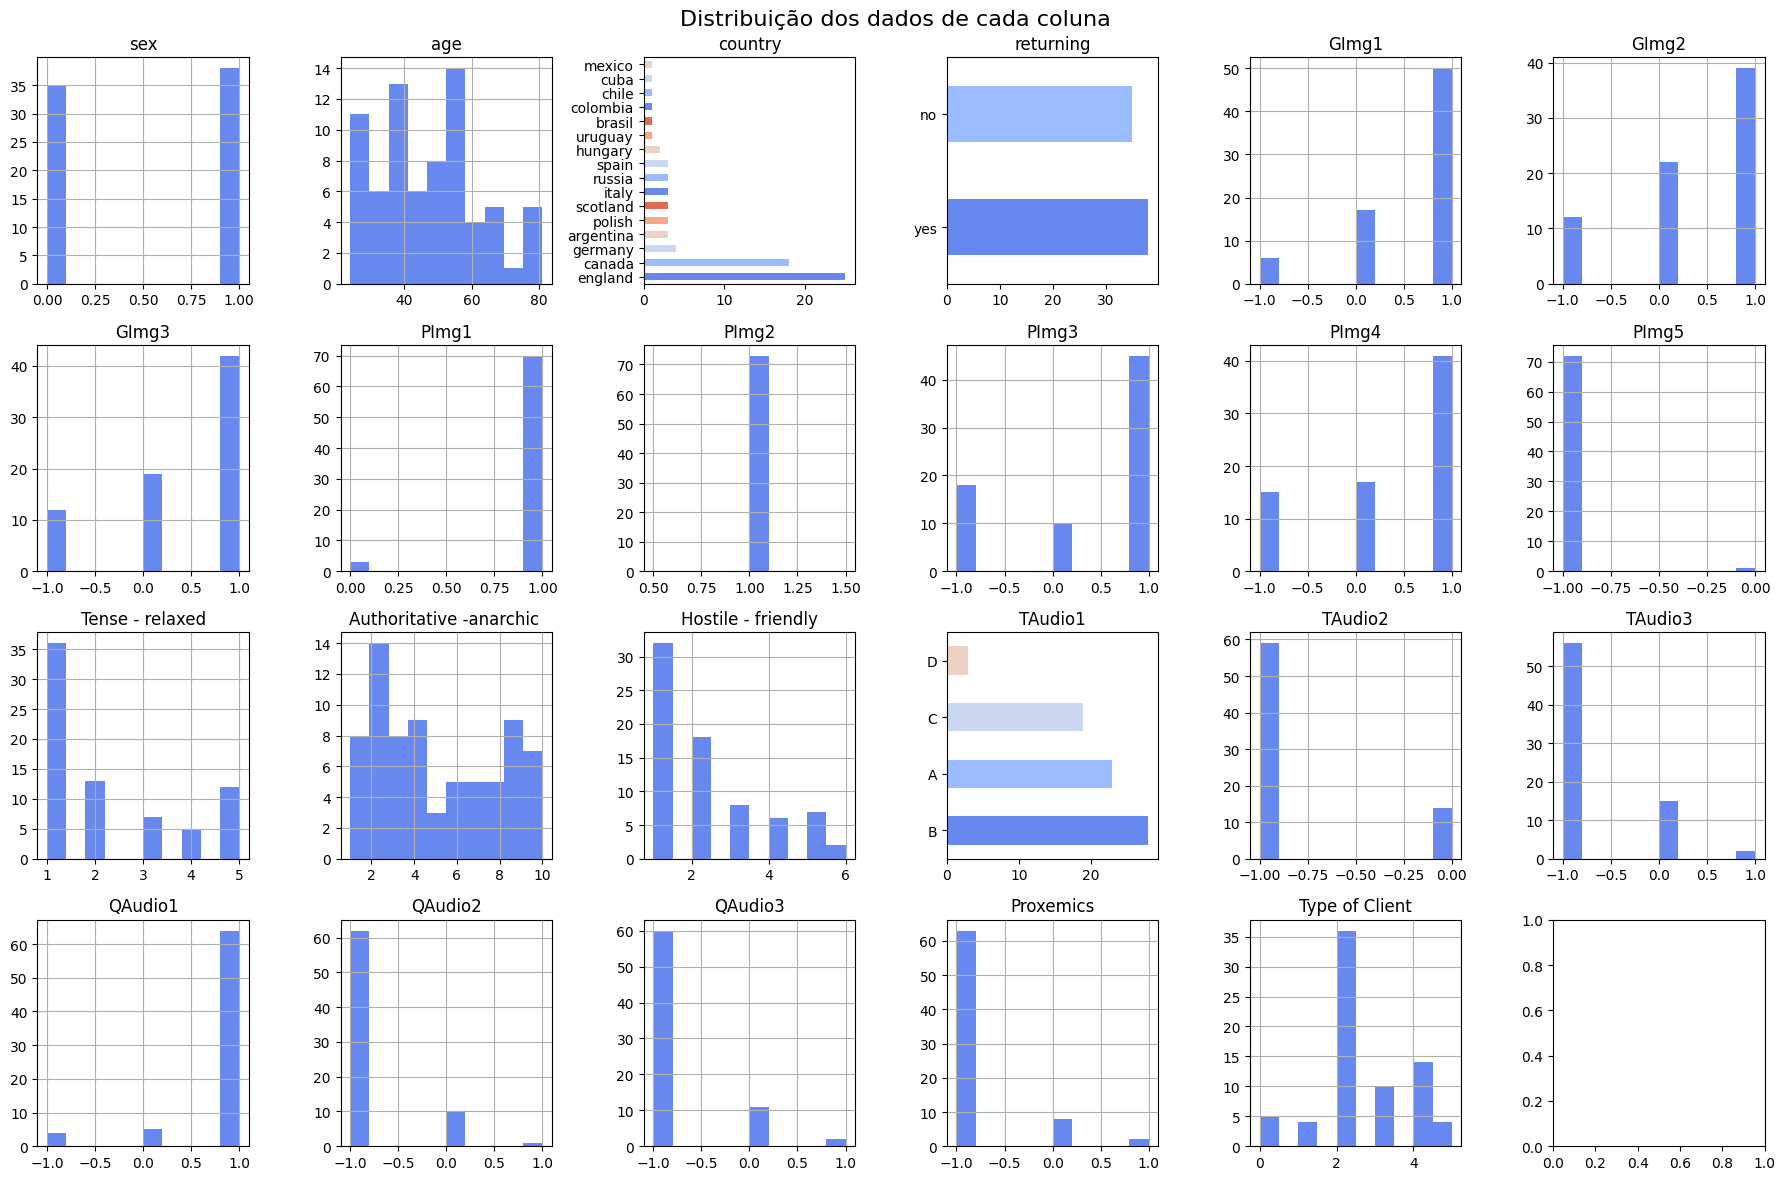

In [35]:
# Definir uma paleta de cores personalizada
colors = sns.color_palette("coolwarm")

# Configuração do layout dos subplots
nrows = 4  # Número de linhas de subplots
ncols = 6  # Número de colunas de subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))

# Flatten axes para iterar facilmente
axes = axes.flatten()

# Iterar sobre as colunas do DataFrame
for i, col in enumerate(df.columns):
    # Verificar se o subplot atual não ultrapassou o número de colunas
    if i < len(df.columns):
        # Verificar se a coluna possui valores categóricos
        if df[col].dtype == 'object':
            # Contagem de valores e plotagem de gráfico de barras
            df[col].value_counts().plot(kind='barh', ax=axes[i], color=colors)
            axes[i].set_title(col)
        else:
            # Histograma para colunas numéricas
            df[col].hist(ax=axes[i], color=colors[0])  # Usar a primeira cor da paleta para histogramas
            axes[i].set_title(col)
    else:
        # Se a quantidade de subplots for maior que o número de colunas, desligue o eixo
        axes[i].axis('off')

plt.suptitle('Distribuição dos dados de cada coluna', size=16)

# Ajustar layout e mostrar os subplots
plt.tight_layout()
plt.show()

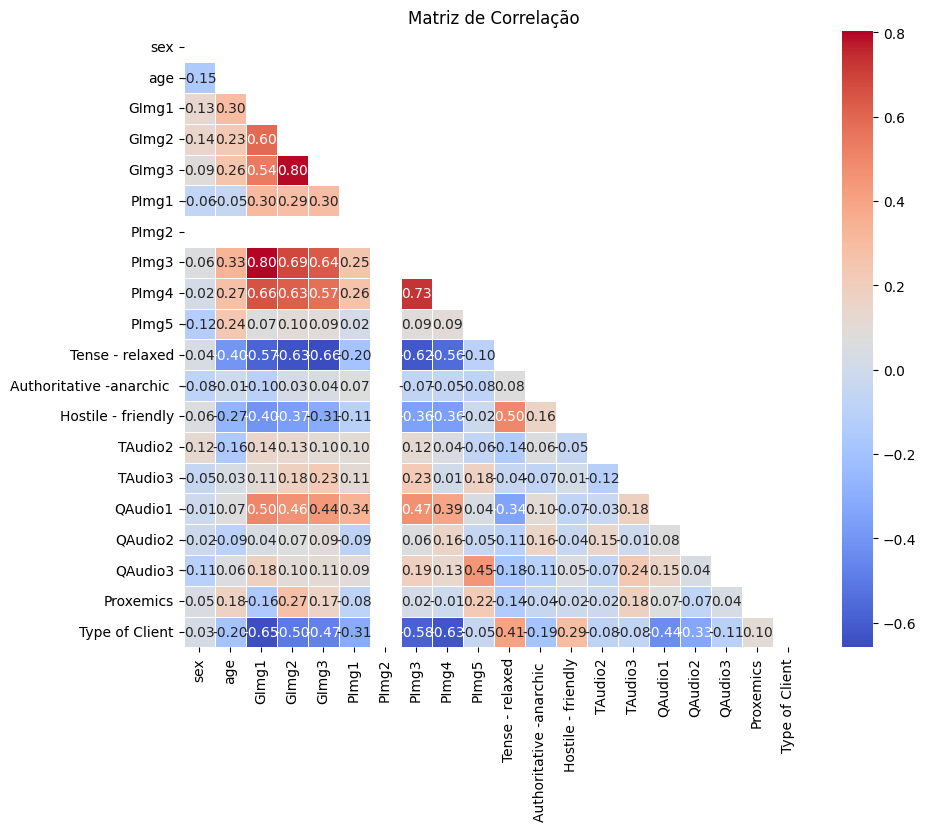

In [36]:
# Matriz de correlação
matriz_corr = df.corr(numeric_only=True)
mask = np.zeros_like(matriz_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt = '.2f', linewidths=0.5, mask=mask)
plt.title('Matriz de Correlação')
plt.show()

In [37]:
# A coluna "PImg2" será removida pelo fato de apresentar apenas o 1 para
# todas as obserções da base de dados, não agregando informação para as demais features.

# A coluna "sex" será removida pois apresenta uma correlação próximo a zero, em relação
# às outras features, isto é, ela não está fortemente relaciona linearmente às outras features.

df = df.drop(columns=['sex', 'PImg2'])

Faça as demais transformações que julgar necessárias na base de dados.

In [38]:
# Encoding da feature "TAudio1", como existe uma relação de ordem optei pelo de LabelEncoder
from sklearn.preprocessing import LabelEncoder
le_1 = LabelEncoder()
le_1.fit(df['TAudio1'])
df['TAudio1_le'] = le_1.transform(df['TAudio1'])

In [39]:
# Encoding da feature "returning" usando o método LabelEncoder
le_2 = LabelEncoder()
le_2.fit(df['returning'])
df['returning_le'] = le_2.transform(df['returning'])

In [40]:
# Encoding da feature "country" usando o método One-Hot-Encoding

country_dummies = pd.get_dummies(df['country'], prefix='country')
data = pd.concat([df, country_dummies], axis=1)

# remover as colunas que passaram pelo processo de encoding
data.drop(['country', 'TAudio1', 'returning'], axis=1, inplace=True)

In [41]:
# reordenando as colunas para que a coluna "Type of Client" seja a última
data = data[['age', 'GImg1', 'GImg2', 'GImg3', 'PImg1', 'PImg3', 'PImg4', 'PImg5',
             'Tense - relaxed', 'Authoritative -anarchic ', 'Hostile - friendly',
             'TAudio2', 'TAudio3', 'QAudio1', 'QAudio2', 'QAudio3', 'Proxemics',
             'TAudio1_le', 'returning_le', 'country_argentina',
             'country_brasil', 'country_canada', 'country_chile', 'country_colombia',
             'country_cuba', 'country_england', 'country_germany', 'country_hungary',
             'country_italy', 'country_mexico', 'country_polish', 'country_russia',
             'country_scotland', 'country_spain', 'country_uruguay', 'Type of Client']]

# exibindo os cinco primeiros registros
data.head()

,age,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,TAudio1_le,returning_le,country_argentina,country_brasil,country_canada,country_chile,country_colombia,country_cuba,country_england,country_germany,country_hungary,country_italy,country_mexico,country_polish,country_russia,country_scotland,country_spain,country_uruguay,Type of Client
0,42,1,0,0,1,0,0,-1,4,8,3,-1,-1,0,-1,-1,-1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,60,1,0,0,1,1,1,-1,2,9,1,-1,-1,1,1,-1,-1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,25,0,0,0,1,0,1,-1,5,10,5,-1,-1,1,-1,-1,-1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,43,1,-1,-1,1,0,0,-1,3,2,1,-1,-1,1,-1,0,-1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,0,0,0,1,0,1,-1,3,9,3,-1,-1,1,0,-1,-1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


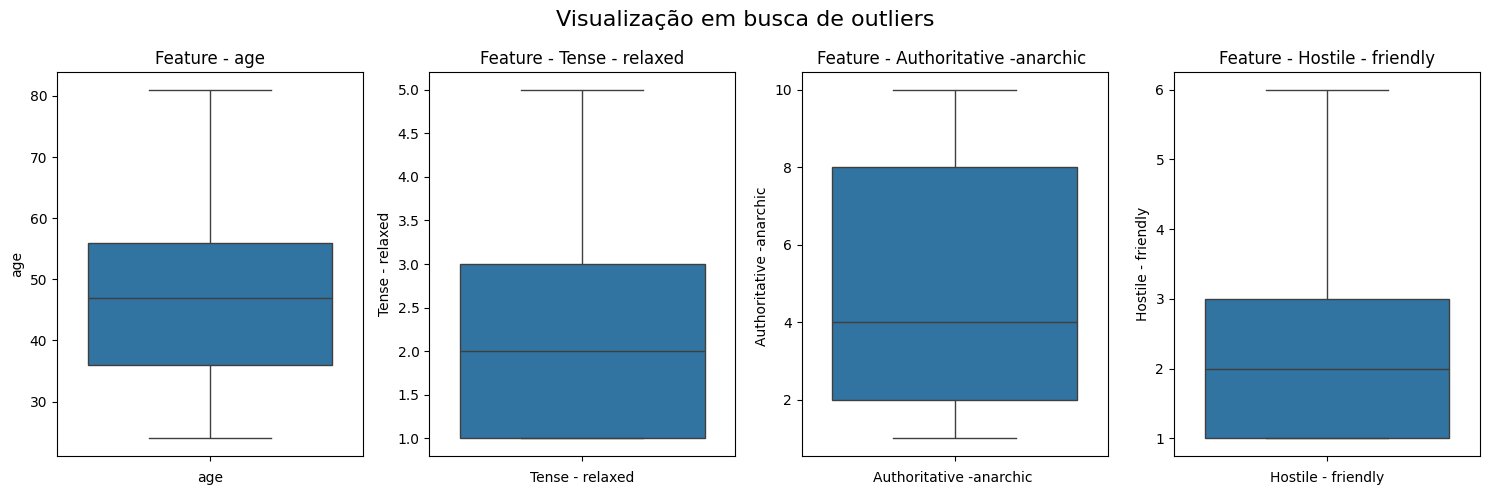

In [43]:
# Visualização das features 'age', 'Tense - relaxed', 'Authoritative -anarchic ', 'Hostile - friendly' em busca de outliers
colunas_graf = ['age', 'Tense - relaxed', 'Authoritative -anarchic ', 'Hostile - friendly']
fig, axs = plt.subplots(1, len(colunas_graf), figsize=(15, 5))
plt.gcf()

# Loop sobre as colunas do DataFrame
for i, column in enumerate(colunas_graf):
    sns.boxplot(data=df[column], ax=axs[i])  # Plotar boxplot
    axs[i].set_title(f'Feature - {column}')  # Definir título do subplot
    axs[i].set_xlabel(f'{column}')  # Definir rótulo do eixo x

plt.suptitle('Visualização em busca de outliers', size=16)

plt.tight_layout()  # Ajustar layout para evitar sobreposição de elementos
plt.show()  # Mostrar gráficos

###Separação treino/teste

Separe os valores e os rótulos da base de dados.

In [44]:
X = data.iloc[:,:-1] # variáveis independentes
y = data['Type of Client'] # variável dependente

Separe a base de dados em teste e treino. Use a divisão 75% para treino 25% para teste

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=111)

<ipython-input-80-2a28ad67b048>:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax2 = sns.barplot(x = y_test.value_counts().index,


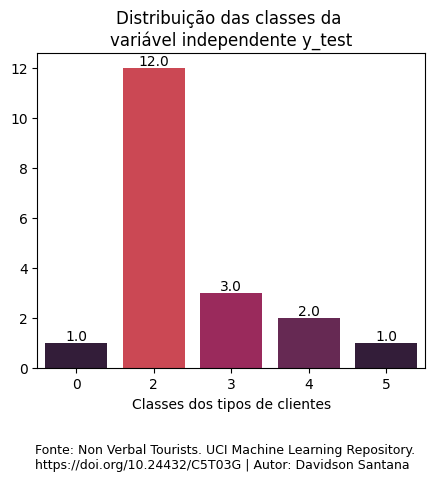

In [80]:
fig, ax2 = plt.subplots(figsize=(5,5))
cores = sns.color_palette("rocket")
ax2 = sns.barplot(x = y_test.value_counts().index,
                 y = y_test.value_counts().values,
                 hue=y_test.value_counts().values, palette=cores,
                 legend=False);

plt.title("Distribuição das classes da \nvariável independente y_test")
plt.xlabel('Classes dos tipos de clientes');

# Adicionar anotações para cada barra
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.figtext(0.12, 0.05, 'Fonte: Non Verbal Tourists. UCI Machine Learning Repository. \nhttps://doi.org/10.24432/C5T03G | Autor: Davidson Santana', fontsize=9)

# Ajustar a posição dos subplots para deixar mais espaço na parte inferior
plt.subplots_adjust(bottom=0.25)

plt.savefig('02-dist_type_of_client-y_test.png')
plt.show()

In [47]:
# padronização dos dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

###KNN

Instancie e treine a KNN com diversos valores para os vizinhos. Durante o fim do treino calcule metricas que julgue que venham a agregar com o problema e justifique porque usou elas.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer

In [49]:
vizinhos = [1, 3, 5, 7, 11, 17]

predicoes = []

for k in vizinhos:
  # Criando uma instancia KNN com n_neighbors = 5
  knn = KNeighborsClassifier(n_neighbors=k)

  # ajustando o modelo aos dados treinados
  knn.fit(X_train_scaled, y_train)

  # Supondo que y_test seja os rótulos originais do conjunto de teste e y_pred seja as previsões feitas pelo modelo
  y_pred = knn.predict(X_test_scaled)
  predicoes.append(y_pred)

  f1 = f1_score(y_test, y_pred, average='weighted')

  # print(f'Score para k=1: {knn.score(X_test_scaled, y_test)}')
  print(f'F1-score para k={k}: {f1}')

F1-score para k=1: 0.8596491228070174
F1-score para k=3: 0.8026315789473685
F1-score para k=5: 0.7942857142857144
F1-score para k=7: 0.848421052631579
F1-score para k=11: 0.625563909774436
F1-score para k=17: 0.625563909774436


A métrica *f1-score* foi escolhida por ser a média harmônica da *precision* e da *recall*.

Para esta tarefa de classificação, ela ajuda a aprofundar como está o desempenho da classificação, pois ela leva em consideração a *precision* (para os valores preditos como *m*, quais realmente eram *m*) e a *recall* (dos valores *m*, quantos realmente foram preditos corretamente). E esta última nos ajuda a perceber qual classe foi melhor predita, considerando o fato da feature de classificação estar desbalanceada.

A acurácia, por levar em consideração os acertos, não é uma opção coerente de métrica a ser utilizada sozinha, visto que a feature de classificação estar desbalanceada.**negrito**

Plote a matriz de confusão.

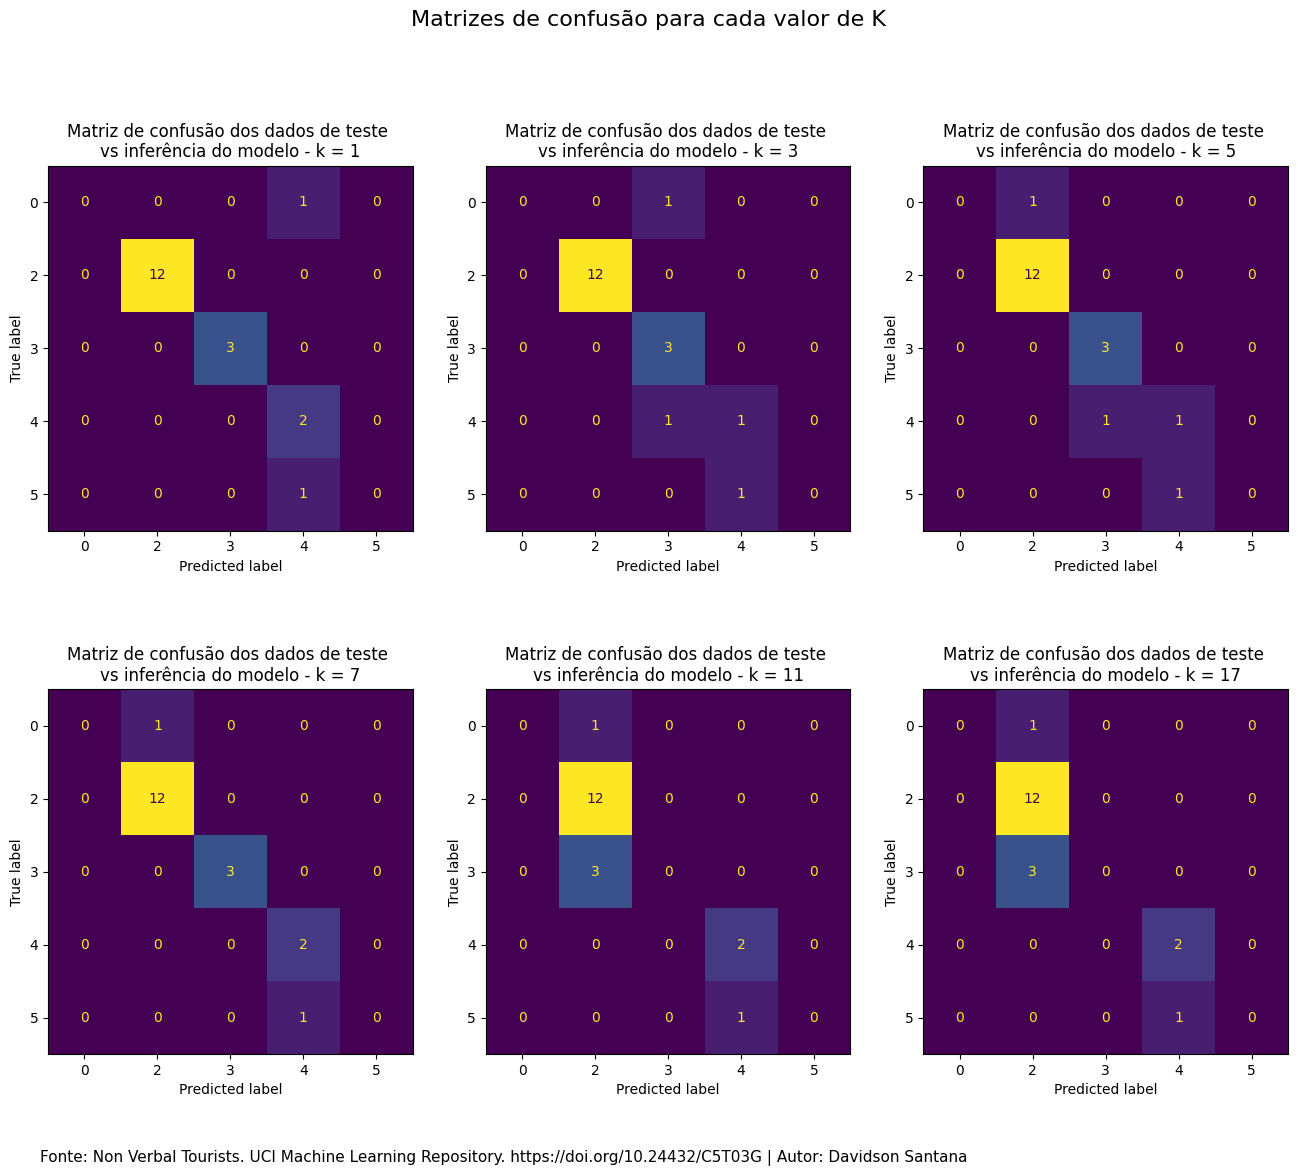

In [57]:
# criando a visualização da matriz de confusão para cada k treinado anteriormente

fig, axs = plt.subplots(2, 3, figsize=(16, 12))

for i in range(len(vizinhos)):
    k = vizinhos[i]
    cm = confusion_matrix(y_test, predicoes[i])
    cmd = ConfusionMatrixDisplay(cm, display_labels=sorted(y_test.unique()))
    cmd.plot(ax=axs[i//3, i%3])  # Selecionar o eixo correto na grade
    axs[i//3, i%3].set_title(f"Matriz de confusão dos dados de teste \nvs inferência do modelo - k = {k}")
    cmd.im_.colorbar.remove()

plt.suptitle('Matrizes de confusão para cada valor de K', size=16)

plt.figtext(0.12, 0.02,'Fonte: Non Verbal Tourists. UCI Machine Learning Repository. https://doi.org/10.24432/C5T03G | Autor: Davidson Santana', fontsize=11);

# Ajustar a posição dos subplots para deixar mais espaço na parte inferior
plt.subplots_adjust(bottom=0.08)

# plt.tight_layout()
plt.savefig('matriz_confusao_varios_k.png')
plt.show()

Exiba as métricas do classification report.

In [62]:
for j in range(len(vizinhos)):
  k = vizinhos[j]
  report = classification_report(y_test, predicoes[j], zero_division=0)

  print('------------------------------------------------')
  print(f'Métricas do Classificantion Report para k = {k}')
  print('------------------------------------------------')
  print(report)
  print('\n')


------------------------------------------------
Métricas do Classificantion Report para k = 1
------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         1

    accuracy                           0.89        19
   macro avg       0.50      0.60      0.53        19
weighted avg       0.84      0.89      0.86        19



------------------------------------------------
Métricas do Classificantion Report para k = 3
------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        12
           3       0.60      1.00      0.75         3
    

Otimizar o valor de K
- Ache o melhor valor de k para o algoritmo k-NN. Utilize o intervalo de 1 a 30.

In [63]:
# Dicionário para armazenar a média da F1-score para cada valor de k
mean_f1_scores = {}

# Loop sobre diferentes valores de k
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)

    # Calcular a F1-score usando a validação cruzada k-fold
    f1_scores = cross_val_score(knn, X, y, cv=4, scoring='f1_weighted')

    mean_f1_score = f1_scores.mean()

    # Armazenar a média da F1-score para o valor atual de k
    mean_f1_scores[k] = mean_f1_score

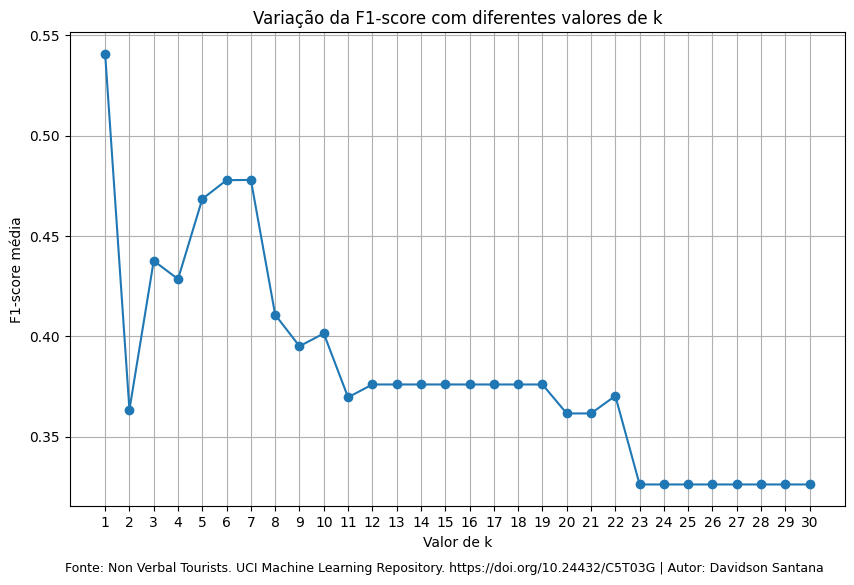

In [65]:
k_values = list(mean_f1_scores.keys()) # lista com todos os valores de k treinados
k_f1_scores = list(mean_f1_scores.values()) # as respectivas médias do f1-score dos k treiandos

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_f1_scores, marker='o', linestyle='-')
plt.title('Variação da F1-score com diferentes valores de k')
plt.xlabel('Valor de k')
plt.ylabel('F1-score média')
plt.xticks(k_values)
plt.grid(True)
plt.figtext(0.12, -0.02,'Fonte: Non Verbal Tourists. UCI Machine Learning Repository. https://doi.org/10.24432/C5T03G | Autor: Davidson Santana', fontsize=9);

# Ajustar a posição dos subplots para deixar mais espaço na parte inferior
plt.subplots_adjust(bottom=0.09)

plt.show()

Exiba a média dos resultados obtidos do experimento anterior

In [66]:
for chave in mean_f1_scores.keys():
  print(f"F1-score médio correspondente a k={chave} é {mean_f1_scores[chave]}.")

F1-score médio correspondente a k=1 é 0.5409281718227457.
F1-score médio correspondente a k=2 é 0.3633208652945495.
F1-score médio correspondente a k=3 é 0.43762595848889957.
F1-score médio correspondente a k=4 é 0.4284936649925209.
F1-score médio correspondente a k=5 é 0.46845531153311476.
F1-score médio correspondente a k=6 é 0.4778179138924753.
F1-score médio correspondente a k=7 é 0.47791830118775197.
F1-score médio correspondente a k=8 é 0.4107218366428893.
F1-score médio correspondente a k=9 é 0.39502805673858304.
F1-score médio correspondente a k=10 é 0.4013956365272155.
F1-score médio correspondente a k=11 é 0.36955802968960866.
F1-score médio correspondente a k=12 é 0.37596828609986505.
F1-score médio correspondente a k=13 é 0.37596828609986505.
F1-score médio correspondente a k=14 é 0.37596828609986505.
F1-score médio correspondente a k=15 é 0.37596828609986505.
F1-score médio correspondente a k=16 é 0.37596828609986505.
F1-score médio correspondente a k=17 é 0.37596828609986

In [67]:
# Encontrar o melhor valor de k que maximiza a média da F1-score
melhor_k = max(mean_f1_scores, key=mean_f1_scores.get)
melhor_f1_score = mean_f1_scores[melhor_k]

print(f"Melhor valor de k: {melhor_k}")
print(f"F1-score médio correspondente: {melhor_f1_score}")

Melhor valor de k: 1
F1-score médio correspondente: 0.5409281718227457


Treine um modelo de k-NN com o melhor valor de k obtido e:

1. Exiba as métricas do Classification Report para o modelo k-NN
2. Plot a matriz de confusão

In [68]:
# Criando uma instancia KNN com n_neighbors = 1
knn = KNeighborsClassifier(n_neighbors=melhor_k)

# ajustando o modelo aos dados de treino
knn.fit(X_train_scaled, y_train)

# Seja y_test seja os rótulos originais do conjunto de teste e y_pred as previsões feitas pelo modelo
y_pred = knn.predict(X_test_scaled)

<Figure size 1600x1200 with 0 Axes>

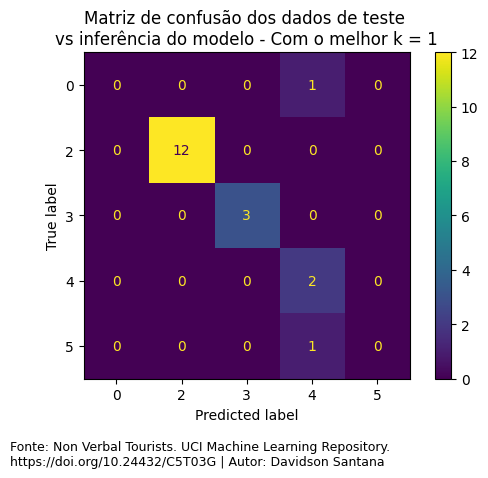

In [73]:
# criando a visualização da matriz de confusão
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=sorted(y_test.unique()))
cmd.plot()
plt.title("Matriz de confusão dos dados de teste \nvs inferência do modelo - Com o melhor k = 1")

plt.figtext(0.12, 0.02,'Fonte: Non Verbal Tourists. UCI Machine Learning Repository. \nhttps://doi.org/10.24432/C5T03G | Autor: Davidson Santana', fontsize=9);

# Ajustar a posição dos subplots para deixar mais espaço na parte inferior
plt.subplots_adjust(bottom=0.2)

plt.savefig('matriz_confusao_melhor_k_1.png')
plt.show()

###Random Forest

Instancie e treine a Random Forest com os parâmetros default do algoritmo. Durante o fim do treino calcule metricas que julgue que venham a agregar com o problema e justifique porque usou elas.

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

average = 'weighted'

rnd_precision = precision_score(y_test, y_pred_rf, average=average, zero_division=0)
rnd_recall = recall_score(y_test, y_pred_rf, average=average)
rnd_f1_score = f1_score(y_test, y_pred_rf, average=average, zero_division=0)

print('-------------------------------------')
print('Métricas de treino para Random Forest')
print('-------------------------------------')
print(f'PRECISION: {rnd_precision}')
print(f'RECALL: {rnd_recall}')
print(f'F1-SCORE: {rnd_f1_score}')

-------------------------------------
Métricas de treino para Random Forest
-------------------------------------
PRECISION: 0.8421052631578947
RECALL: 0.8947368421052632
F1-SCORE: 0.8596491228070174


A métrica *f1-score* novamente foi escolhida, pelas mesmas razões expostas anteriormente para o K-NN.

Exiba as métricas do Classification Report para o modelo Random Forest

In [75]:
metricas_rf = classification_report(y_test, y_pred_rf, zero_division=0)
print("RANDOM FOREST - Precision, Recall, F1-score (parâmetros default):")
print(metricas_rf)

RANDOM FOREST - Precision, Recall, F1-score (parâmetros default):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         1

    accuracy                           0.89        19
   macro avg       0.50      0.60      0.53        19
weighted avg       0.84      0.89      0.86        19



Plote a matriz de confusão.

<Figure size 1600x1200 with 0 Axes>

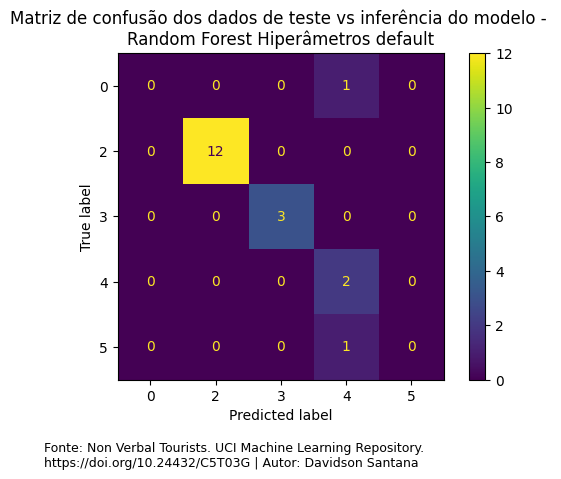

In [76]:
# criando a visualização da matriz de confusão
plt.figure(figsize = (16,12))
cm_rf = confusion_matrix(y_test, y_pred_rf)
cmd_rf = ConfusionMatrixDisplay(cm_rf, display_labels=sorted(y_test.unique()))
cmd_rf.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo - \nRandom Forest Hiperâmetros default")

plt.figtext(0.12, 0.02,'Fonte: Non Verbal Tourists. UCI Machine Learning Repository. \nhttps://doi.org/10.24432/C5T03G | Autor: Davidson Santana', fontsize=9);

# Ajustar a posição dos subplots para deixar mais espaço na parte inferior
plt.subplots_adjust(bottom=0.2)

plt.savefig('matriz_confusao_random_forest_default.png')
plt.show()

## Grid Search

Faça um grid search dos parâmetros da **Random Forest**:
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
4. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

Links de referência:
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
2. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [107]:
from sklearn.model_selection import GridSearchCV

# definir os parâmetros

# param_grid_1 = [{'n_estimators':[100, 200, 300], 'max_features':[1, 2, 7, 14, 21, 35],
#                'max_depth':[None, 10, 20], 'min_samples_split':[2, 4, 16],
#                'min_samples_leaf':[2, 4, 16], 'bootstrap':[False, True]}]

param_grid_1 = [{'n_estimators':[100, 200], 'max_features':[1, 2, 7],
               'max_depth':[None, 10], 'min_samples_split':[2, 4],
               'min_samples_leaf':[2, 4], 'bootstrap':[False, True]}]

forest_clf = RandomForestClassifier()

# grid_search_1 = GridSearchCV(forest_clf_1, param_grid_1, cv = 3, scoring='f1_weighted', verbose=2, return_train_score=True)
grid_search_1 = GridSearchCV(forest_clf, param_grid_1, cv = 3, scoring='f1_weighted', return_train_score=True)


# Treinar o GridSearchCV
grid_search_1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [False, True], 'max_depth': [None, 10],
                          'max_features': [1, 2, 7], 'min_samples_leaf': [2, 4],
                          'min_samples_split': [2, 4],
                          'n_estimators': [100, 200]}],
             return_train_score=True, scoring='f1_weighted')

In [108]:
cvres1 = grid_search_1.cv_results_
print('-------------------------------------')
print('rank_test_score | mean_score | params')
print('-------------------------------------')
for rank_test_score, mean_score, params in zip(cvres1['rank_test_score'], cvres1['mean_test_score'], cvres1['params']):
  print(f'{rank_test_score} | {mean_score: .4f} | {params}')

-------------------------------------
rank_test_score | mean_score | params
-------------------------------------
53 |  0.5197 | {'bootstrap': False, 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
75 |  0.5187 | {'bootstrap': False, 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
51 |  0.5198 | {'bootstrap': False, 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
67 |  0.5188 | {'bootstrap': False, 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
88 |  0.5075 | {'bootstrap': False, 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
46 |  0.5207 | {'bootstrap': False, 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
86 |  0.5086 | {'bootstrap': False

In [127]:
print("-------------------------------")
print("Melhores parâmetros (1ª rodada)")
print("-------------------------------")
for key in grid_search_1.best_params_.keys():
  print(f'{key}: {grid_search_1.best_params_[key]}')

-------------------------------
Melhores parâmetros (1ª rodada)
-------------------------------
bootstrap: False
max_depth: 10
max_features: 7
min_samples_leaf: 2
min_samples_split: 2
n_estimators: 100


Exiba a média dos resultados obtidos do experimento anterior

In [126]:
print("Média dos resultados obtidos:")
print(np.mean(grid_search_1.cv_results_['mean_test_score']))

Média dos resultados obtidos:
0.5295806750723638


Executando uma nova rodada de ajustes dos hiperparâmetros encontrados anteriormente.

In [114]:
# definir os parâmetros
param_grid_2 = [{'n_estimators':[100, 300], 'max_features':[7, 28, 35],
               'max_depth':[10, 20, 50, 100], 'min_samples_split':[2, 16, 32],
               'min_samples_leaf':[2, 8, 16], 'bootstrap':[True, False]}]

# forest_clf_2 = RandomForestClassifier()

# grid_search_2 = GridSearchCV(forest_clf_2, param_grid_2, cv = 3, scoring='f1_weighted', verbose=2)
grid_search_2 = GridSearchCV(forest_clf, param_grid_2, cv = 3, scoring='f1_weighted', return_train_score=True)

# Treinar o GridSearchCV
grid_search_2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 20, 50, 100],
                          'max_features': [7, 28, 35],
                          'min_samples_leaf': [2, 8, 16],
                          'min_samples_split': [2, 16, 32],
                          'n_estimators': [100, 300]}],
             return_train_score=True, scoring='f1_weighted')

In [115]:
cvres2 = grid_search_2.cv_results_
print('-------------------------------------')
print('rank_test_score | mean_score | params')
print('-------------------------------------')
for rank_test_score, mean_score, params in zip(cvres2['rank_test_score'], cvres2['mean_test_score'], cvres2['params']):
  print(f'{rank_test_score} | {mean_score} | {params}')

-------------------------------------
rank_test_score | mean_score | params
-------------------------------------
16 | 0.5801336956307717 | {'bootstrap': True, 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
16 | 0.5801336956307717 | {'bootstrap': True, 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
100 | 0.5219558435932705 | {'bootstrap': True, 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 16, 'n_estimators': 100}
120 | 0.5211052322163434 | {'bootstrap': True, 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 16, 'n_estimators': 300}
313 | 0.2735042735042735 | {'bootstrap': True, 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 32, 'n_estimators': 100}
313 | 0.2735042735042735 | {'bootstrap': True, 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 32,

In [116]:
print("-------------------------------")
print("Melhores parâmetros (2ª rodada)")
print("-------------------------------")
for key in grid_search_2.best_params_.keys():
  print(f'{key}: {grid_search_2.best_params_[key]}')

-------------------------------
Melhores parâmetros (2ª rodada)
-------------------------------
bootstrap: True
max_depth: 20
max_features: 28
min_samples_leaf: 2
min_samples_split: 2
n_estimators: 100


In [118]:
# Exibir a média dos resultados obtidos
print("Média dos resultados obtidos:")
print(np.mean(grid_search_2.cv_results_['mean_test_score']))

Média dos resultados obtidos:
0.44803019632373037


Treine um modelo de Random Forest com os melhores valores dos parâmetros obtidos:

1. Exiba as métricas do Classification Report
2. Plot a matriz de confusão

In [128]:
# treinando um modelo de Random Forest com os melhores valores de parâmetros obtidos
# na primeira rodada de ajustes de parâmetros

# -------------------------------
# Melhores parâmetros (1ª rodada)
# -------------------------------
# bootstrap: False
# max_depth: 10
# max_features: 7
# min_samples_leaf: 2
# min_samples_split: 2
# n_estimators: 100


forest_clf_1 = RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=2,
                                    min_samples_split= 2, n_estimators =100, bootstrap=False)

forest_clf_1.fit(X_train, y_train)

y_pred_clf_1 = forest_clf_1.predict(X_test)

metricas_clf_1 = classification_report(y_test, y_pred_clf_1, zero_division=0)
print("RANDOM FOREST - Precision, Recall, F1-score (1ª rodada):")
print(metricas_clf_1)

RANDOM FOREST - Precision, Recall, F1-score (1ª rodada):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         1

    accuracy                           0.89        19
   macro avg       0.50      0.60      0.53        19
weighted avg       0.84      0.89      0.86        19



<Figure size 1600x1200 with 0 Axes>

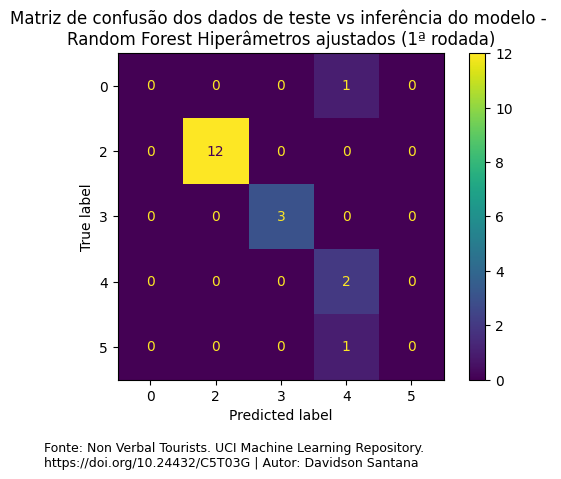

In [129]:
# criando a visualização da matriz de confusão a partir dos melhores valores de parâmetros obtidos
# na primeira rodada de ajustes de parâmetros
plt.figure(figsize = (16,12))
cm_clf_1 = confusion_matrix(y_test, y_pred_clf_1)
cmd_clf_1 = ConfusionMatrixDisplay(cm_clf_1, display_labels=sorted(y_test.unique()))
cmd_clf_1.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo - \nRandom Forest Hiperâmetros ajustados (1ª rodada)")

plt.figtext(0.12, 0.02,'Fonte: Non Verbal Tourists. UCI Machine Learning Repository. \nhttps://doi.org/10.24432/C5T03G | Autor: Davidson Santana', fontsize=9);

# Ajustar a posição dos subplots para deixar mais espaço na parte inferior
plt.subplots_adjust(bottom=0.2)

plt.savefig('matriz_confusao_random_forest_1a_rodada.png')
plt.show()

In [130]:
# treinando um modelo de Random Forest com os melhores valores de parâmetros obtidos
# na segunda rodada de ajustes de parâmetros

# -------------------------------
# Melhores parâmetros (2ª rodada)
# -------------------------------
# bootstrap: True
# max_depth: 20
# max_features: 28
# min_samples_leaf: 2
# min_samples_split: 2
# n_estimators: 100

forest_clf_2 = RandomForestClassifier(max_depth=20, max_features=28, min_samples_leaf=2,
                                    min_samples_split= 2, n_estimators =100, bootstrap=True)

forest_clf_2.fit(X_train, y_train)

y_pred_clf_2 = forest_clf_2.predict(X_test)

metricas_clf_2 = classification_report(y_test, y_pred_clf_2, zero_division=0)
print("RANDOM FOREST - Precision, Recall, F1-score (2ª rodada):")
print(metricas_clf_2)

RANDOM FOREST - Precision, Recall, F1-score (2ª rodada):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         3
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         1

    accuracy                           0.95        19
   macro avg       0.73      0.80      0.76        19
weighted avg       0.91      0.95      0.93        19



<Figure size 1600x1500 with 0 Axes>

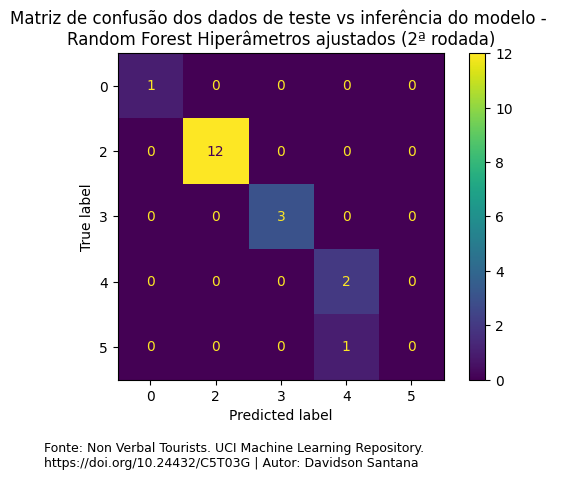

In [131]:
# criando a visualização da matriz de confusão a partir dos melhores valores de parâmetros obtidos
# na segunda rodada de ajustes de parâmetros

plt.figure(figsize = (16,15))
cm_clf_2 = confusion_matrix(y_test, y_pred_clf_2)
cmd_clf_2 = ConfusionMatrixDisplay(cm_clf_2, display_labels=sorted(y_test.unique()))
cmd_clf_2.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo - \nRandom Forest Hiperâmetros ajustados (2ª rodada)")

plt.figtext(0.12, 0.02,'Fonte: Non Verbal Tourists. UCI Machine Learning Repository. \nhttps://doi.org/10.24432/C5T03G | Autor: Davidson Santana', fontsize=9);

# Ajustar a posição dos subplots para deixar mais espaço na parte inferior
plt.subplots_adjust(bottom=0.2)

plt.savefig('matriz_confusao_random_forest_2a_rodada.png')
plt.show()

## Conclusão

A partir do que foi feito, conclui-se que:

- O algoritmo Random Forest Classifier apresentou um melhor desempenho nas predições feitas, quando teve seus parâmetros *default* ajustados, comparado ao algoritmo K-NN, aplicado a uma base que possui a variável dependente com classes desbalanceadas.

- O algoritmo Random Forest Classifier, utilizando sem ajustes nos parâmetros *default*, apresenta o mesmo desempenho do K-NN com o seu melhor valor de k vizinhos.

- A métrica *accuracy* não é recomendada para avaliar, sozinha, um classificador (independemente do algoritmo implementado) quando a variável dependente possui classes desbalanceadas. A exemplo disto, é que tanto para o K-NN quanto para o Random Forest Classifier (no modo default) a acurácia foi de mais de 80%, entretanto, ambos modelos não previram classes de menor frequência.

- O Grid Search apresenta-se como uma ferramenta para ter-se a mão, na hora de ajustar os parâmetros de um modelo. Apesar do tempo que a mesma leva testando todas as combinações possíveis de parâmetros, é bem melhor utilizá-la que fazer tal combinação por conta própria. Claro, é sempre importante, como foi feito neste trabalho, fazer novas rodadas de ajustes e ir avaliando o modelo.